In [45]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
import os
import urllib

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_regression
from sklearn.datasets import make_friedman1

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
# sns.set_style( 'white' )

In [87]:
url = "https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt"
data_path = "data/fruit/"
file_name = "fruit_data_with_colors.txt"

In [74]:
def downloadDataset(url, directory, file_name):
    if not os.path.exists(directory):
        os.makedirs(directory)
    urllib.urlretrieve(url, directory + file_name)

In [4]:
downloadDataset(url, data_path, file_name)

In [75]:
fruits = pd.read_table(data_path + file_name)
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [76]:
fruit_features = [col for i, col in enumerate(fruits.columns) if i > 2]
fruits_x = fruits[fruit_features]
fruit_names = fruits.fruit_name.unique()
fruits_y = fruits.fruit_label

In [77]:
train_x, test_x, train_y, test_y = train_test_split(fruits_x, fruits_y, random_state = 0)

In [78]:
training_accuracy = []
testing_accuracy = []
k_neighbor_setting = range(1, 11)
print(k_neighbor_setting)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [79]:
for neighbor in k_neighbor_setting:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(train_x, train_y)
    
    train_acc = knn.score(train_x, train_y)
    training_accuracy.append(train_acc)
    
    test_acc = knn.score(test_x, test_y)
    testing_accuracy.append(test_acc)

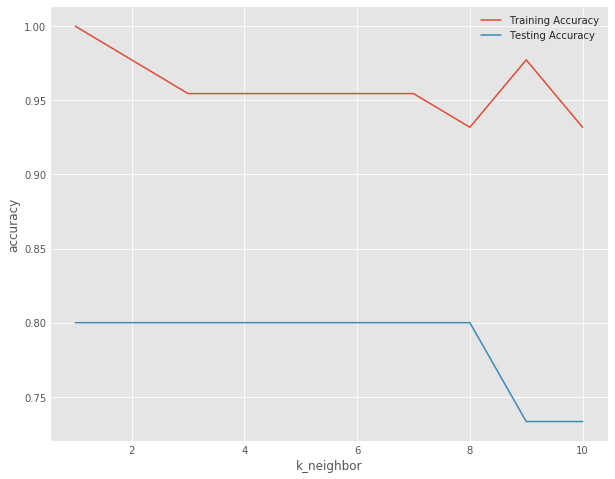

In [89]:
plt.figure(figsize = (10, 8))
plt.plot(k_neighbor_setting, training_accuracy, label = "Training Accuracy")
plt.plot(k_neighbor_setting, testing_accuracy, label = "Testing Accuracy")
plt.xlabel("k_neighbor")
plt.ylabel("accuracy")
plt.legend()

In [90]:
scaler = MinMaxScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.fit_transform(test_x)

In [91]:
training_accuracy = []
testing_accuracy = []
k_neighbor_setting = range(1, 11)
print(k_neighbor_setting)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [92]:
for neighbor in k_neighbor_setting:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(train_x_scaled, train_y)
    
    train_acc = knn.score(train_x_scaled, train_y)
    training_accuracy.append(train_acc)
    
    test_acc = knn.score(test_x_scaled, test_y)
    testing_accuracy.append(test_acc)

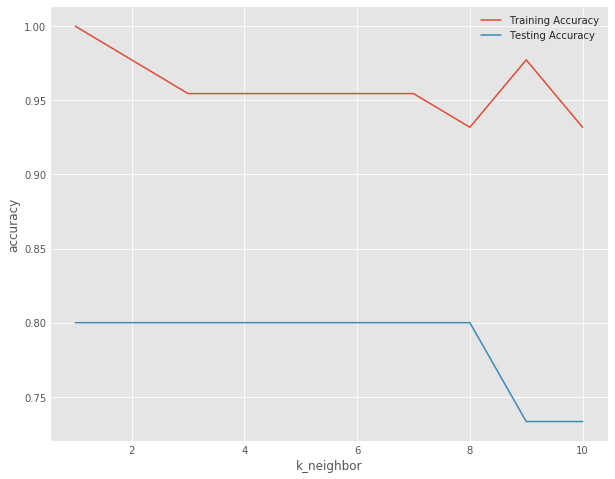

In [93]:
plt.figure(figsize = (10, 8))
plt.plot(k_neighbor_setting, training_accuracy, label = "Training Accuracy")
plt.plot(k_neighbor_setting, testing_accuracy, label = "Testing Accuracy")
plt.xlabel("k_neighbor")
plt.ylabel("accuracy")
plt.legend()

In [94]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x_scaled, train_y)

train_acc = knn.score(train_x_scaled, train_y)
test_acc = knn.score(test_x_scaled, test_y)

print("Training Accuracy : {0}".format(train_acc))
print("Testing Accuracy : {0}".format(test_acc))

Training Accuracy : 0.954545454545
Testing Accuracy : 0.8


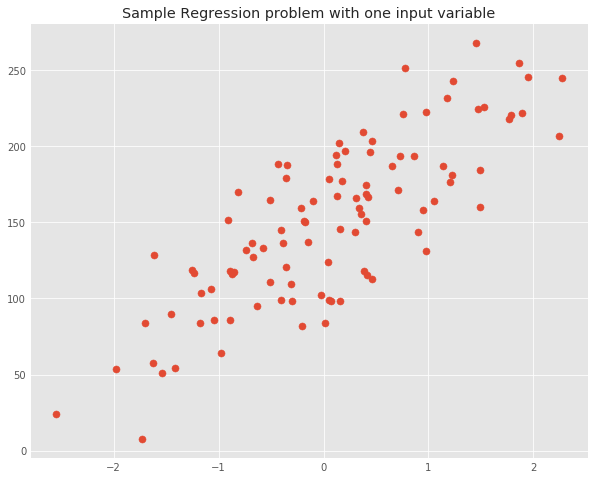

In [98]:
# Simple Regression
make_reg_x, make_reg_y = make_regression(n_samples = 100, n_features = 1, bias = 150.0, noise = 30, random_state = 0)
plt.figure(figsize = (10, 8))
plt.title("Sample Regression problem with one input variable")
plt.scatter(make_reg_x, make_reg_y, marker = "o", s = 50)
plt.show()